# Introduction to Neural Networks

## Import packages

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [4]:
X_train[0].shape

(28, 28)

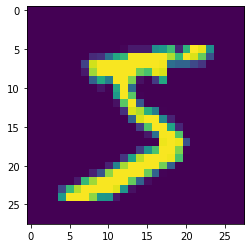

In [5]:
# plt.imshow(X_train[0], cmp = 'gray')
plt.imshow(X_train[0])

In [6]:
y_train[0]

5

## Preprocessing the image data

In [7]:
image_height, image_width = 28, 28

In [8]:
X_train = X_train.reshape(60000, image_height * image_width)
print(X_train.shape)

(60000, 784)


In [9]:
X_test = X_test.reshape(10000, image_height * image_width)
print(X_test.shape)

(10000, 784)


Range the data between 0 to 255

In [10]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [11]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

Convert the numbers to values between 0 to 1 instead of 0 to 255

In [12]:
X_train /= 255.0
X_test /= 255.0

print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [13]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [14]:
y_train = to_categorical(y_train,10)
print(y_train.shape)

y_test = to_categorical(y_test,10)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

In [15]:
model = Sequential()

In [16]:
help(Dense)

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`, then we create
 |  a `kernel` with shape `(d1, units)`, and the `kernel` operates along axis 2
 |  of the `input`, 

We know we have 512 outputs, RELU activation function, 784 pixels of the imaage

Let's develop the layers of our neural netwoks

In [17]:
# Layer 1: 512 outputs, RELU activation function, need to specify the input shape
model.add(Dense(512, activation = 'relu', input_shape = (784,)))

# Layer 2: 512 outputs. RELU activation function, no need to specify the input shape as the model will get it from the first layer
model.add(Dense(512, activation = 'relu'))

# Final Layer: 10 outputs, softmax activation function because we want 10 classes as our output
model.add(Dense(10, activation = 'softmax'))

## Compile the model

In [18]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Number of parameters for the first layer 

# input size * nodes in the next layer + bias for each vector
784 * 512 + 512 

401920

In [23]:
# Number of parameters for the second layer 

# input size * nodes in the next layer + bias for each vector
512 * 512 + 512 

262656

In [24]:
# Number of parameters for the final layer 

# input size * nodes in the next layer + bias for each vector
512 * 10 + 10

5130

## Train the model

The default batch_size is 32, that's why we get 60000 / 32 = 1875 observations in each epoch

In [25]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1824 - accuracy: 0.9446 - val_loss: 0.1139 - val_accuracy: 0.9642
Epoch 2/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0796 - accuracy: 0.9755 - val_loss: 0.0896 - val_accuracy: 0.9711
Epoch 3/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0549 - accuracy: 0.9826 - val_loss: 0.0848 - val_accuracy: 0.9741
Epoch 4/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0432 - accuracy: 0.9862 - val_loss: 0.0618 - val_accuracy: 0.9825
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0342 - accuracy: 0.9890 - val_loss: 0.0761 - val_accuracy: 0.9793
Epoch 6/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0282 - accuracy: 0.9909 - val_loss: 0.0727 - val_accuracy: 0.9803
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0263 - accuracy: 0.9920 - val_loss: 0.0788 - va

## What is the accuracy of the model?

### Plot the accuracy of the training model

### Plot the accuracy of training and validation set

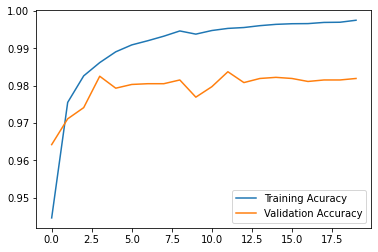

In [37]:
plt.plot(history.history['accuracy'], label = 'Training Acuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

### Accuracy of training and validation with loss

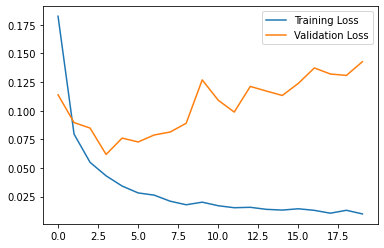

In [38]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

## Evaluate the Model

In [39]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1427 - accuracy: 0.9819


In [40]:
score

[0.14274440705776215, 0.9818999767303467]

The model has an accuracy of 98.18% which is very good for a Neural Network model.

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons
- What results do you get when trying to use another activation function?

In [41]:
model2 = Sequential()

In [42]:
# Layer 1: 512 outputs, RELU activation function, need to specify the input shape
model2.add(Dense(512, activation = 'tanh', input_shape = (784,)))

# Layer 2: 512 outputs. RELU activation function, no need to specify the input shape as the model will get it from the first layer
model2.add(Dense(512, activation = 'tanh'))

# Layer 2: 512 outputs. RELU activation function, no need to specify the input shape as the model will get it from the first layer
model2.add(Dense(512, activation = 'tanh'))

# Final Layer: 10 outputs, softmax activation function because we want 10 classes as our output
model2.add(Dense(10, activation = 'softmax'))

In [43]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 932362 (3.56 MB)
Trainable params: 932362 (3.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model2.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [46]:
history2 = model2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2606 - accuracy: 0.9204 - val_loss: 0.1618 - val_accuracy: 0.9532
Epoch 2/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1310 - accuracy: 0.9606 - val_loss: 0.1285 - val_accuracy: 0.9622
Epoch 3/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0995 - accuracy: 0.9687 - val_loss: 0.0969 - val_accuracy: 0.9689
Epoch 4/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0785 - accuracy: 0.9745 - val_loss: 0.1260 - val_accuracy: 0.9645
Epoch 5/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0644 - accuracy: 0.9797 - val_loss: 0.0989 - val_accuracy: 0.9718
Epoch 6/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0564 - accuracy: 0.9820 - val_loss: 0.0862 - val_accuracy: 0.9739
Epoch 7/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0492 - accuracy: 0.9840 - val_loss: 0.0963 -

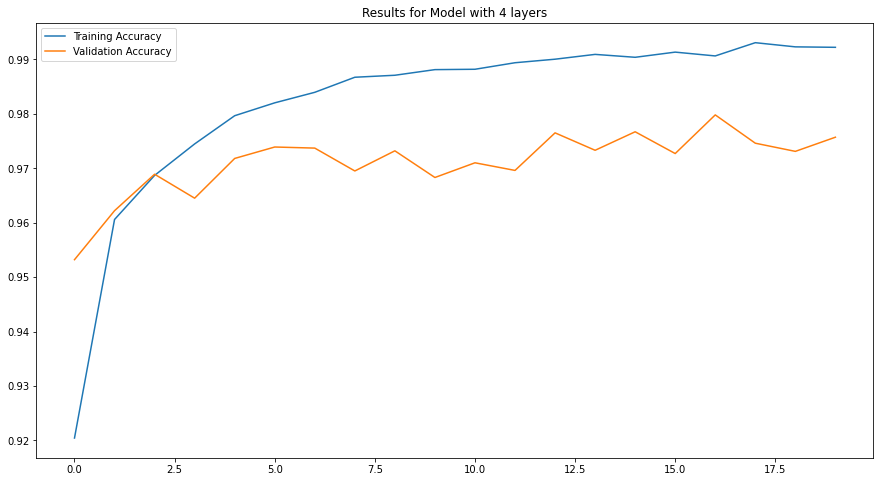

In [48]:
plt.subplots(figsize= (15,8))
plt.plot(history2.history['accuracy'], label = 'Training Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Results for Model with 4 layers')
plt.legend()
plt.show()

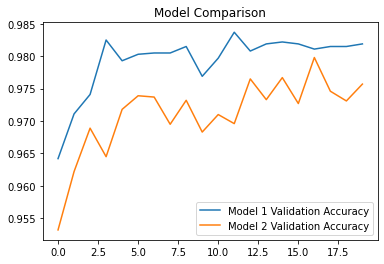

In [49]:
plt.plot(history.history['val_accuracy'], label = 'Model 1 Validation Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Model 2 Validation Accuracy')
plt.title('Model Comparison')
plt.legend()
plt.show()

In [50]:
model3 = Sequential()

In [51]:
# Layer 1: 512 outputs, RELU activation function, need to specify the input shape
model3.add(Dense(512, activation = 'relu', input_shape = (784,)))

# Layer 2: 512 outputs. RELU activation function, no need to specify the input shape as the model will get it from the first layer
model3.add(Dense(512, activation = 'relu'))

# Layer 2: 512 outputs. RELU activation function, no need to specify the input shape as the model will get it from the first layer
model3.add(Dense(512, activation = 'relu'))

# Final Layer: 10 outputs, softmax activation function because we want 10 classes as our output
model3.add(Dense(10, activation = 'softmax'))

In [53]:
model3.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [54]:
history3 = model3.fit(X_train, y_train, epochs=20,validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1967 - accuracy: 0.9405 - val_loss: 0.1115 - val_accuracy: 0.9636
Epoch 2/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0918 - accuracy: 0.9725 - val_loss: 0.0806 - val_accuracy: 0.9761
Epoch 3/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0652 - accuracy: 0.9804 - val_loss: 0.1309 - val_accuracy: 0.9637
Epoch 4/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0532 - accuracy: 0.9840 - val_loss: 0.0804 - val_accuracy: 0.9765
Epoch 5/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0416 - accuracy: 0.9877 - val_loss: 0.0754 - val_accuracy: 0.9811
Epoch 6/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0373 - accuracy: 0.9888 - val_loss: 0.0774 - val_accuracy: 0.9792
Epoch 7/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0335 - accuracy: 0.9900 - val_loss: 0.0938 -

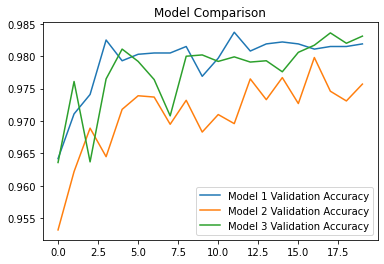

In [55]:
plt.plot(history.history['val_accuracy'], label = 'Model 1 Validation Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Model 2 Validation Accuracy')
plt.plot(history3.history['val_accuracy'], label = 'Model 3 Validation Accuracy')

plt.title('Model Comparison')
plt.legend()
plt.show()

In [83]:
score1 = model.evaluate(X_test, y_test)
score2 = model2.evaluate(X_test, y_test)
score3 = model3.evaluate(X_test, y_test)

scores = [score1, score2, score3]
for i in range(3):
    print("The accuracy on the validation using model {} is: {}%".format(i+1, round(scores[i][1]*100,2)))

313/313 [==============================] - 1s 2ms/step - loss: 0.1276 - accuracy: 0.9831
The accuracy on the validation using model 0 is: 98.19%
The accuracy on the validation using model 1 is: 97.57%
The accuracy on the validation using model 2 is: 98.31%


Scores show that on average, model 3 which has 4 layers with ReLU activation functions for all layers before th eoutput layer and softmax activation function for the output layer slightly performed better than the other two models. 